In [1]:
!pip install keras --upgrade

     |████████████████████████████████| 378kB 31.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/google_colab_gpu/GSOC 2020/CERN-HSF

/content/drive/My Drive/google_colab_gpu/GSOC 2020/CERN-HSF


In [0]:
import numpy as np
import pandas as pd
import h5py
from sklearn.utils import shuffle

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import cv2
#from keras.datasets import mnist
from numpy import savetxt
from keras.utils import np_utils
from keras.models import Sequential,load_model, model_from_json
from keras.layers import Add, GlobalAveragePooling2D, Activation, BatchNormalization, Input, Conv1D, Conv2D, MaxPool2D, Flatten, Dense, Dropout, AveragePooling2D,LeakyReLU
from keras import optimizers
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend as K
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.callbacks import Callback
import keras
from keras import regularizers
import seaborn as sns
from sklearn import preprocessing
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [41]:
#Please shift to Keras version >2.3 and tensorflow version =v2 for the running the inference of the model.
print(tf.__version__)
print(keras.__version__)

2.2.0-rc1
2.3.1


In [9]:
#Enter the batch size you want to evaluate on
batch_size=input("Enter the batch size(max 1000): ")

Enter the batch size(max 1000): 100


In [0]:
batch_start_idx=0
batch_end_idx=int(batch_size)

In [0]:
filename='SingleElectronPt50_IMGCROPS_n249k_RHv1_inference.hdf5'
data1 = h5py.File(filename, 'r')
Y1=data1['y']
X1=data1['X']

In [21]:
filename='SinglePhotonPt50_IMGCROPS_n249k_RHv1_inference.hdf5'
data0 = h5py.File(filename, 'r')
Y0=data0['y']
X0=data0['X']
print("Data loading completed.")

Data loading completed.


In [0]:
X_final=np.concatenate((X0[:],X1[:]),axis=0)
Y_final=np.concatenate((Y0[:],Y1[:]),axis=0)

In [0]:
X_final=(X_final[:,:,:,0].reshape((X_final.shape[0],X_final.shape[1],X_final.shape[2],1)))

In [0]:
X_final, Y_final = shuffle(X_final, Y_final)


In [25]:
data1.close()
data0.close()
print("Data preparation completed.")

Data preparation completed.


In [32]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model2 = model_from_json(loaded_model_json)
# load weights into new model
model2.load_weights("model2.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
model2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        1849

In [0]:
optimizer=optimizers.Adam(lr=0.00003)
model2.compile(loss = 'binary_crossentropy', optimizer=optimizer,metrics = ['accuracy','mae','mse'])

In [0]:
target=model2.predict(X_final[batch_start_idx:batch_end_idx])
target[target<0.5]=0
target[target>0.5]=1
true_values=Y_final[batch_start_idx:batch_end_idx]
target=target.reshape(true_values.shape)

In [36]:
metrics=model2.evaluate(X_final[batch_start_idx:batch_end_idx,:,:,:],true_values.reshape((true_values.shape[0],1)),verbose=1)
print(model2.metrics_names[0]+": "+str(metrics[0])+"\n"+model2.metrics_names[1]+": "+str(metrics[1])+"\n"+model2.metrics_names[2]+": "+str(metrics[2])+"\n"+str(model2.metrics_names[3])+": "+str(metrics[3]))

100/100 [==============================] - 0s 569us/step
loss: 0.43171454906463624
accuracy: 0.8100000023841858
mae: 0.30461326241493225
mse: 0.1354389190673828


In [0]:
savetxt('output.csv',target,delimiter=',')
savetxt('ground_truth.csv',true_values,delimiter=',')

In [38]:
print("The outputs have been saved in file named output.csv corresponding to the respective indices. The first 20 values of output are:\n"+str(target[:20]))

The outputs have been saved in file named output.csv corresponding to the respective indices. The first 20 values of output are:
[1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.]


In [39]:
print("The first 20 values of true values are:\n"+str(true_values[:20]))

The first 20 values of true values are:
[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]


In [0]:
from sklearn.metrics import roc_curve
y_pred = model2.predict(X_final[batch_start_idx:batch_end_idx,:,:,:]).ravel()
fpr, tpr, thresholds = roc_curve(true_values.reshape((true_values.shape[0],1)), y_pred)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

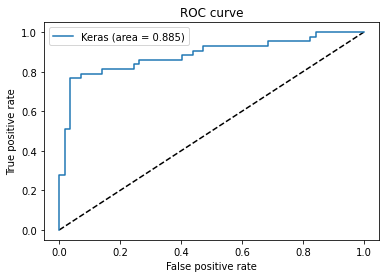

In [48]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [0]:
#For retraining
#model2.fit(X_train0,Y_train,batch_size=1024, epochs=20, validation_data=(X_valid0,Y_valid))